|           | f1  | f2  | y   |
| :-------- | :-- | :-- | :-- |
| $x^{(1)}$ | 3   | 6   | 1   |
| $x^{(2)}$ | 6   | 4   | 1   |
| $x^{(3)}$ | 8   | 2   | 3   |
| $x^{(4)}$ | 7   | 5   | 3   |
| $x^{(5)}$ | 1   | 4   | 2   |
| $x^{(6)}$ | 2   | 2   | 2   |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/474/original/Screenshot_2023-07-23_at_7.44.29_PM.png?1690130963 width=700>


1. **Step1:** We find the **Euclidean distance between $x_q = [2,5]$ and all the training data.**

|           | f1  | f2  | y   | $d^{(i)} = \sqrt{(x^q_{f1}-x^{(i)}_{f1})^2 + (x^q_{f2}-x^{(i)}_{f2})^2}$ |
| :-------- | :-- | :-- | :-- | :----------------------------------------------------------------------- |
| $x^{(1)}$ | 3   | 6   | 1   | $\sqrt{(1^2 + 1^2)} = 1.41$                                              |
| $x^{(2)}$ | 6   | 4   | 1   | $\sqrt{(4^2 + 1^2)} = 3.00$                                              |
| $x^{(3)}$ | 8   | 2   | 3   | $\sqrt{(6^2 + 3^2)} = 6.48$                                              |
| $x^{(4)}$ | 7   | 5   | 3   | $\sqrt{(5^2 + 0^2)} = 5.00$                                              |
| $x^{(5)}$ | 1   | 4   | 2   | $\sqrt{(1^2 + 1^2)} = 1.41$                                              |
| $x^{(6)}$ | 2   | 2   | 2   | $\sqrt{(0^2 + 2^2)} = 2.00$                                              |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/475/original/Screenshot_2023-07-23_at_7.44.37_PM.png?1690130998 width=700>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/476/original/Screenshot_2023-07-23_at_7.44.47_PM.png?1690131021 width=700>


In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /Users/sanketmishra/Desktop/Desktop/code/scaler/ml/multiclass.csv
100%|███████████████████████████████████████| 14.6k/14.6k [00:00<00:00, 989kB/s]


In [3]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


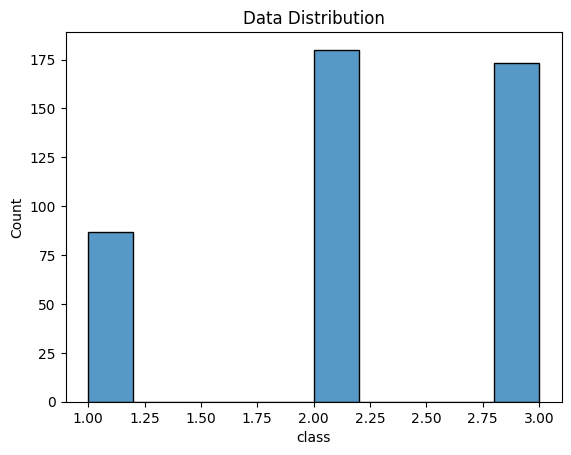

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

In [5]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

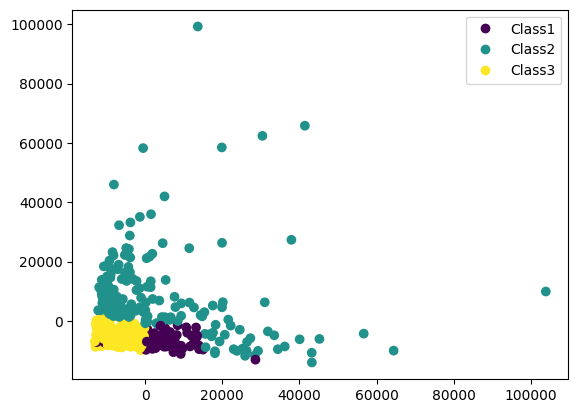

In [7]:
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [10]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_train.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_train.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [11]:
y_val

array([3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 1, 1, 1,
       2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 1, 2,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 1, 1, 3, 2,
       2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 3, 2, 2])

In [12]:
X_val_scaled[50]

array([ 0.65073249, -0.49151135, -0.48436111, -0.6888578 , -0.29269993,
       -0.54361718, -0.26957321])

In [13]:
from sklearn.metrics import euclidean_distances
def knn(x , points , val):
    points = pd.DataFrame(points)
    x = x.reshape(1 , -1)
    # print(x.shape , points[0].to_numpy().reshape(1,-1).shape)
    dist = np.sqrt(np.sum((x - points)**2 , axis = 1))
    distpaired = [(dist[i] , val[i]) for i in range(len(dist))]

    distpaired = np.sort(distpaired , axis = 0)

    class_counts = np.unique(distpaired[:,1] , return_counts= True)
    # print(class_counts)
    index = class_counts[1].argmax()
    pred = class_counts[0][index]
    return pred

knn(X_val_scaled[50] , X_sm , y_sm)

3.0

In [14]:
def knn2(x , points , val):
    points = pd.DataFrame(points)
    val = pd.DataFrame(val)
    x = x.reshape(1 , -1)
    val['distances'] = points.apply(lambda el : euclidean_distances(el.values.reshape(1 , -1) , x) , axis = 1)
    val.sort_values('distances' , inplace = True)
    return val.iloc[:5 , 0].value_counts().reset_index().iloc[0,0]



knn2(X_val_scaled[50] , X_sm , y_sm)

3

## KNN using sklearn


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')
knn.fit(X_sm , y_sm)

KNeighborsClassifier(metric='euclidean')

In [18]:
knn.score(X_val_scaled , y_val)

0.9156626506024096

In [20]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val)
print(classification_report(y_pred , y_val))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.46      0.63        83
           3       0.00      0.00      0.00         0

    accuracy                           0.46        83
   macro avg       0.33      0.15      0.21        83
weighted avg       1.00      0.46      0.63        83



/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-